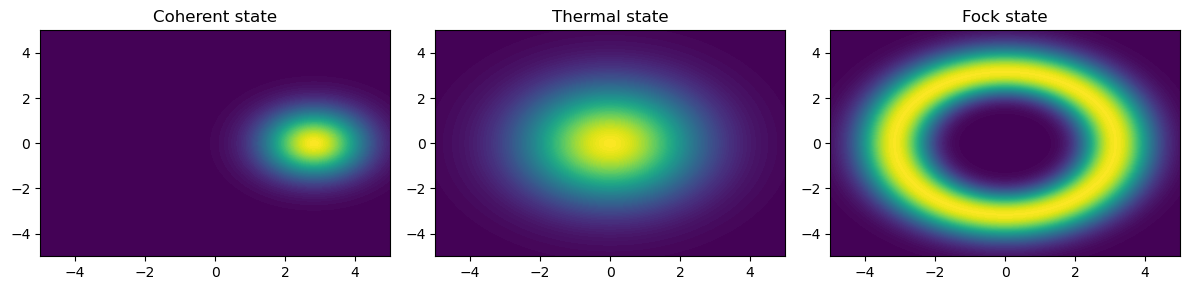

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from qutip import coherent, thermal_dm, fock, qfunc

# Parameters
N = 40
alpha = 2.0
n_th = 2.0
n_fock = 5
xvec = np.linspace(-5, 5, 400)  # Higher resolution grid

# States
rho_coherent = coherent(N, alpha) * coherent(N, alpha).dag()
rho_thermal = thermal_dm(N, n_th)
rho_fock = fock(N, n_fock) * fock(N, n_fock).dag()

# Husimi Q functions with Gaussian smoothing
Q_coherent = gaussian_filter(qfunc(rho_coherent, xvec, xvec), sigma=1)
Q_thermal = gaussian_filter(qfunc(rho_thermal, xvec, xvec), sigma=1)
Q_fock = gaussian_filter(qfunc(rho_fock, xvec, xvec), sigma=1)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, Q, title in zip(axes, [Q_coherent, Q_thermal, Q_fock],
                        ["Coherent state", "Thermal state", "Fock state"]):
    im = ax.contourf(xvec, xvec, Q, 100, cmap='jet')  # or 'Blues'
    ax.set_title(title)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()
